In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
def ar1_data_generate(phi = 0.8, sigma = 1, length = 2, num_series = 1000, seed = 12345):

    arparams = np.array([phi])
    maparams = np.array([0])
    ar = np.r_[1, -arparams] # include zero-lag and use an opposite sign, see note below
    ma = np.r_[1, maparams] # include zero-lag

    ar1_np = np.zeros((num_series, length+20, 1))
    for i in range(num_series):
        # generate data
        # np.random.seed(seed+i)
        ar1_np[i,:,0] = sm.tsa.arma_generate_sample(ar, ma, nsample = length+20, scale = sigma) # y_{0},...\y_{99}
    return ar1_np[:,20:,:] # 發現series前面的 variance 不是 marginal variance (\sigma^2/(1-\phi^2)), so burn out

def range_normalization(data, num_normalized):
    '''
    將每一條 ts 做 normalization (x-min)/(max - min)
    
    input:  npy (obs, length, channel)
    output: npy (obs, length, channel)
    '''

    obs = data.shape[0]
    channel = data.shape[2]

    min_value = np.min(data[:, 0:num_normalized, :], axis = 1).reshape(obs, 1, channel)
    max_value = np.max(data[:, 0:num_normalized, :], axis = 1).reshape(obs, 1, channel)
    
    data_normalized = (data - min_value)/(max_value - min_value)

    return data_normalized    

In [38]:
num_series_train = 10000
num_series_test = 1000

length = 100

In [39]:
train_ar1 = ar1_data_generate(phi = 0.8, sigma = 1, length = length, num_series = num_series_train, seed = 1)
test_ar1 = ar1_data_generate(phi = 0.8, sigma = 1, length = length, num_series = num_series_test, seed = 12345)

In [40]:
print(train_ar1.shape)
print(test_ar1.shape)

(10000, 100, 1)
(1000, 100, 1)


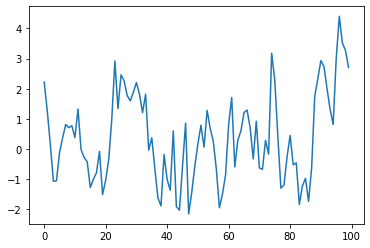

In [41]:
plt.plot(train_ar1[3,:,0])

In [44]:
print(np.var(train_ar1[:,0,0]))
print(np.mean(train_ar1[:,0,0]))
print(np.corrcoef(train_ar1[:,96,0],train_ar1[:,98,0]))

2.7509892687568236
0.005991659143831712
[[1.         0.65313726]
 [0.65313726 1.        ]]


In [36]:
np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_'+str(num_series_train)+'_'+str(length)+'.npy', train_ar1)
np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_'+str(num_series_test)+'_'+str(length)+'.npy', test_ar1)

In [37]:
# train_ar1_stdd = range_normalization(train_ar1, 99)
# test_ar1_stdd = range_normalization(test_ar1, 99)

# np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_'+str(num_series_train)+'_'+str(length)+'_stdd.npy', train_ar1_stdd)
# np.save('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/test_ar1_'+str(num_series_test)+'_'+str(length)+'_stdd.npy', test_ar1_stdd)

In [30]:
1/(1-0.8*0.8) # Y_t marginal variance

2.7777777777777786

In [33]:
np.mean(train_ar1[:,1,0])

0.0002338895081879784

In [18]:
train_ar1_10000_4 = np.load('/home/hchuang/Documents/Project/SSSD_CP/src/datasets/AR/train_ar1_10000_4.npy')

In [20]:
data = train_ar1_10000_4

print(np.var(data[:,0,0]))
print(np.mean(data[:,0,0]))
print(np.corrcoef(data[:,1,0],data[:,2,0]))

2.7615395100995532
-0.006418171137084506
[[1.         0.80389288]
 [0.80389288 1.        ]]


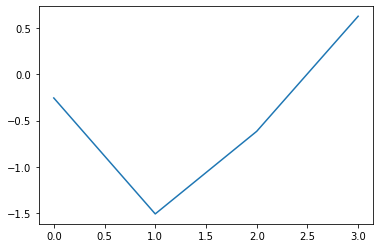

In [19]:
plt.plot(train_ar1_10000_4[0,:,:])